## Installing Required Python Packages

Note: run the following cell once. 

In [1]:
# !pip install -r requirements.txt

## Importing essential Python Packages

In [2]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import optimize
from scipy.optimize import minimize
from astropy.io import fits
from astropy import wcs
from matplotlib import cm
import pickle
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook
# %matplotlib notebook

`sbfTools` hold all the auxiliary functions we use in this notebook.
Make sure that `sbfTools.py` is in located in the same folder as this notebook.

In [3]:
# make sure 
from sbfTools import *

In [4]:
#https://math.stackexchange.com/questions/1114879/detect-if-two-ellipses-intersect

## Object Initialization

In [5]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'


In [6]:
name = "u03396"

In [7]:
inFolder = inFolder + '/'
config   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


In [8]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [9]:
df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

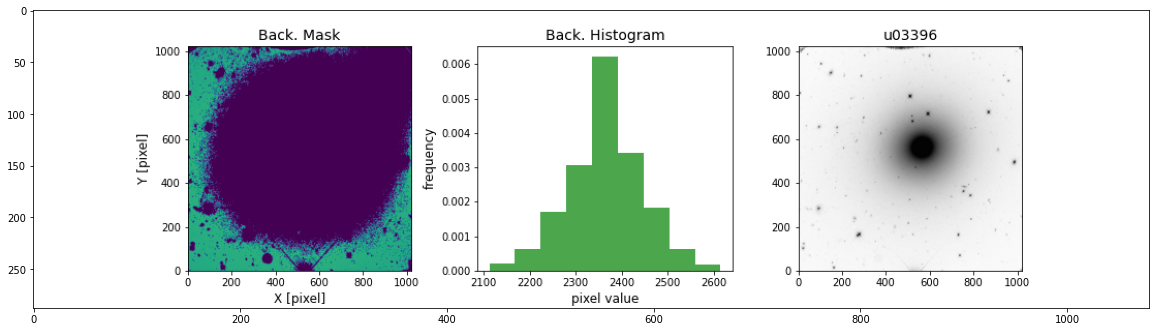

In [10]:
_, ax = plt.subplots(figsize=(20,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_back.png")
ax.imshow(im)

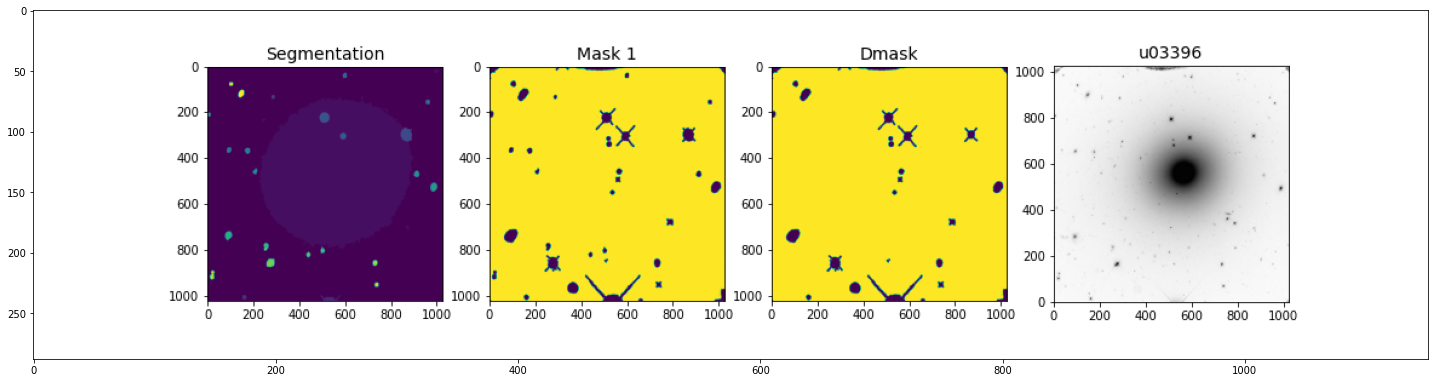

In [11]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_mask.png")
ax.imshow(im)

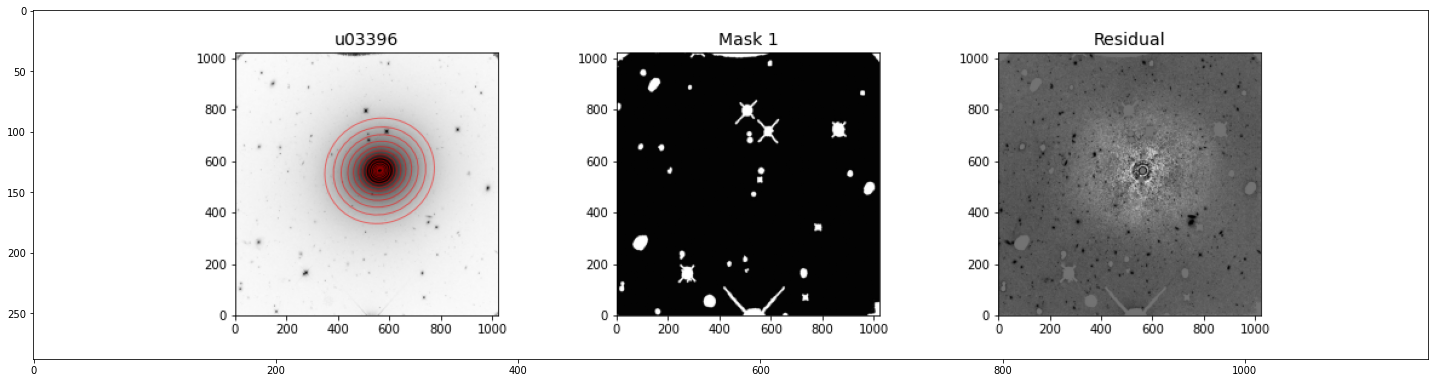

In [12]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_basic_model.png")
ax.imshow(im)

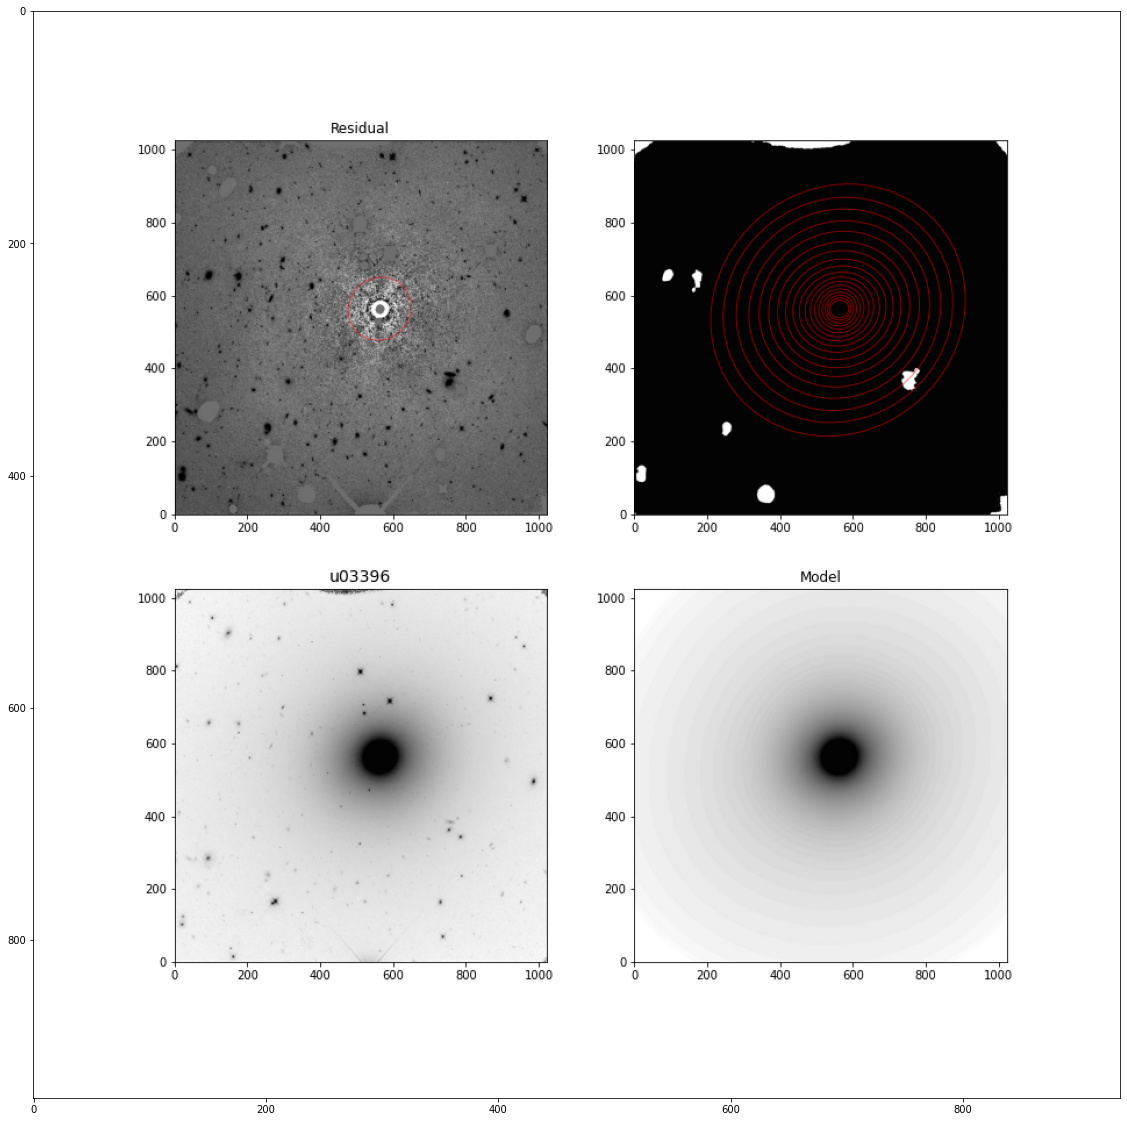

In [13]:
_, ax = plt.subplots(figsize=(20,20))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_model.png")
ax.imshow(im)

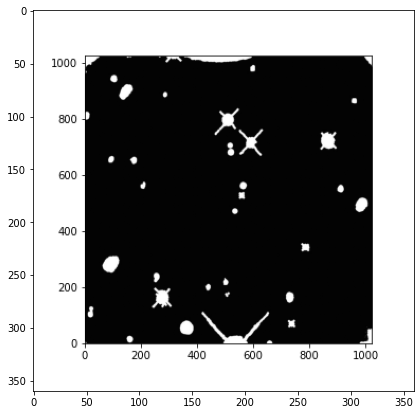

In [14]:
_, ax = plt.subplots(figsize=(7,7))

figName = objRoot+'/'+name+'_combined_mask.png'
im = img.imread(figName)
ax.imshow(im)

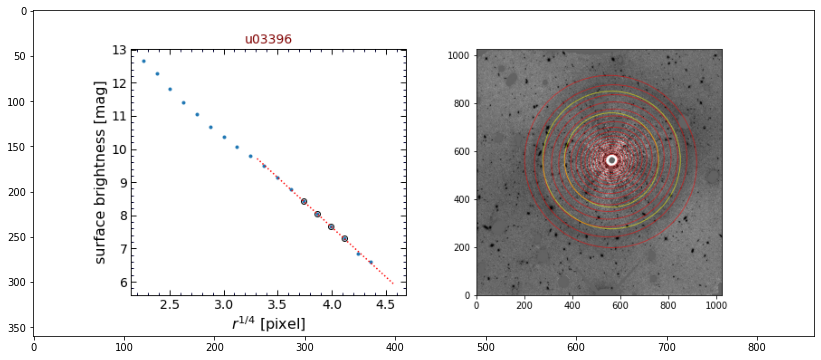

In [15]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_light_profile.png'
im = img.imread(figName)
ax.imshow(im)

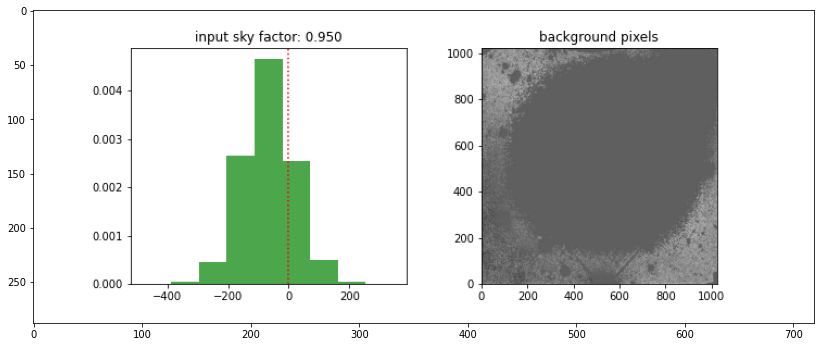

In [16]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_updated_back.png'
im = img.imread(figName)
ax.imshow(im)

In [17]:
df

,value,description
uuid,58b2aebb7ea6,Unique Identifier Code
User,Ehsan,User Name
Time,2022-07-20 12:28:35.806706,Modification Time
Name,u03396,Object Name
X_pixels,1022,X-dimension of image [pixel]
Y_pixels,1025,Y-dimension of image [pixel]
R_max,458,maximum horizontal/vertical distance from cent...
X0,563.268,Object Center X0 [pixel]
Y0,563.234,Object Center Y0 [pixel]
a,88.829,semi-major axis [pixel]


In [18]:
## Internal parameters (sliders and setup)

params

{'backSextract': {'threshold': 0.08},
 'naiveSextract': {'minarea': 200.0, 'threshold': 3.0, 'smooth': 5.0},
 'basic_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0'},
 'second_elliprof': {'r0': 26.0,
  'c_kron': 4.2,
  'sky_factor': 0.83,
  'k_ellipse': 19.0,
  'option': 'COS3X=0',
  'minarea': 704.0,
  'threshold': 4.0,
  'smooth': 3.5,
  'renuc': 2.0}}